<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-of-Lecture-04" data-toc-modified-id="Assignment-of-Lecture-04-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assignment of Lecture 04</a></span><ul class="toc-item"><li><span><a href="#Part-I-Review-the-online-programming." data-toc-modified-id="Part-I-Review-the-online-programming.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Part I Review the online programming.</a></span><ul class="toc-item"><li><span><a href="#Dynamic-Programming-For-Cutting-Problems" data-toc-modified-id="Dynamic-Programming-For-Cutting-Problems-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Dynamic Programming For Cutting Problems</a></span></li><li><span><a href="#Dynamic-Programming-Step" data-toc-modified-id="Dynamic-Programming-Step-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Dynamic Programming Step</a></span></li><li><span><a href="#Edit-Distance" data-toc-modified-id="Edit-Distance-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Edit Distance</a></span></li></ul></li><li><span><a href="#Part1-2:-Finish-the-Solution-Parse-Part-of-Edit-Distance" data-toc-modified-id="Part1-2:-Finish-the-Solution-Parse-Part-of-Edit-Distance-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Part1-2: Finish the Solution Parse Part of Edit-Distance</a></span></li><li><span><a href="#Part-2-Choose-1---2-books-to-keep-reading:" data-toc-modified-id="Part-2-Choose-1---2-books-to-keep-reading:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Part 2 Choose 1 - 2 books to keep reading:</a></span></li><li><span><a href="#Part-3:-Answer-following-questions:" data-toc-modified-id="Part-3:-Answer-following-questions:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Part 3: Answer following questions:</a></span></li></ul></li><li><span><a href="#Part-4-Preparation-of-Project-01" data-toc-modified-id="Part-4-Preparation-of-Project-01-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 4 Preparation of Project-01</a></span><ul class="toc-item"><li><span><a href="#(Optinal)-Finish-the-k-person-salesman-problem:" data-toc-modified-id="(Optinal)-Finish-the-k-person-salesman-problem:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>(Optinal) Finish the k-person-salesman problem:</a></span></li></ul></li></ul></div>

## Assignment of Lecture 04

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### Dynamic Programming For Cutting Problems

In [1]:
from functools import wraps
from collections import defaultdict

original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30]
price = defaultdict(int)
for i, p in enumerate(original_price):
    price[i+1] = p
assert price[1] == 1

solution = {}

def memo(func):
    cache = {}
    @wraps(func)
    def _wrap(n): ## ? *args, **kwargs
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result
    return _wrap

@memo
def r(n):
    max_price, split_point = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (split_point, n - split_point)
    
    return max_price

In [2]:
r(231)

691

#### Dynamic Programming Step

> - 分析子问题重复性
> - 子问题存储
> - Solution通过递归解析

In [3]:
def not_cut(split): return split == 0

def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]
    
    if not_cut(left): return [right]

    return parse_solution(left, revenue_solution) + parse_solution(right, revenue_solution)

In [4]:
parse_solution(19, solution)

[3, 6, 10]

#### Edit Distance

>- Spell Correction
>- Evaluating Machine Translation
>- Speech Recognition

In [1]:
solution = {}

def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [2]:
edit_distance('ABCDE', 'ABCCEF')

2

### Part1-2: Finish the Solution Parse Part of Edit-Distance

In [12]:
candidates = ""# every time string1, string2 change, candidates needs to be updated to ""

def parse_solution(string1, string2, dict_solution, func):

    func(string1, string2)
    global candidates

    if string1 == "" and string2 == "":
        distance = len(candidates.split(", ")) - 1
        return ([distance, candidates[:-2].split(", ")[::-1] if ", " in candidates else candidates])

    if string1 != "" and string2 == "":
        candidates += ("DEL " + string1 + ", ")
        distance = len(candidates.split(", ")) - 1
        return ([distance, candidates[:-2].split(", ")[::-1] if ", " in candidates else candidates])

    if string1 == "" and string2 != "":
        candidates += ("ADD " + string2 + ", ")
        distance = len(candidates.split(", ")) - 1
        return ([distance, candidates[:-2].split(", ")[::-1] if ", " in candidates else candidates])

    if dict_solution[(string1, string2)] == "":
        return parse_solution(string1[:-1], string2[:-1], dict_solution, func)

    if len(dict_solution[(string1, string2)].split(" => ")) == 2:
        candidates += (dict_solution[(string1, string2)] + ", ")
        return parse_solution(string1[:-1], string2[:-1], dict_solution, func)

    if dict_solution[(string1, string2)][:3] == "ADD":
        candidates += (dict_solution[(string1, string2)] + ", ")
        return parse_solution(string1, string2[:-1], dict_solution, func)

    if dict_solution[(string1, string2)][:3] == "DEL":
        candidates += (dict_solution[(string1, string2)] + ", ")
        return parse_solution(string1[:-1], string2, dict_solution, func)

    else:
        print("ERROR")


In [13]:
candidates = ""
parse_solution('ABCDEHJ', 'ABCCEFMN', solution, edit_distance)

[4, ['SUB D => C', 'SUB H => F', 'SUB J => M', 'ADD N']]

In [16]:
candidates = ""# every time string1, string2 change, candidates needs to be updated to ""
parse_solution('ABC', 'ABC', solution, edit_distance)

[0, '']

### Part 2 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑快与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

### Part 3: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

__Ans:__

> [In computer science, if a problem can be solved optimally by breaking it into sub-problems and then recursively finding the optimal solutions to the sub-problems, then it is said to have optimal substructure.](https://en.wikipedia.org/wiki/Dynamic_programming)

- Dynamic programming utilizes recursive to solve the repeatability of subproblems
- In real life, Spell Correction, Speech Recognition and other scenes can be solved by dynamic programming easier
- Obviously, dynamic programming uses recursive while search problem use root iteration

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

__Ans:__

- The advantages of dynamic programming include: fast, accurate, efficient
- Up to now, training a machine learning to fit a function costs space and time
- And when there are new words, the model needs to update again

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

__Ans:__

- Finding the shortest path in a graph
- Revenue Optimal Problems
- Protein-DNA binding (developed in 1970)

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

__Ans:__

- Spell Correction
- Evaluating Machine Translation
- Speech Recognition

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

__Ans:__

- 分析子问题重复性：比如string可以拆分成chararacter组合
- 子问题存储：比对string可以看成character层面的比对
- 通过递归解析问题：大道至简，一串长长的string比对问题最终化为一个character的比对

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

__Ans:__

[Limitations of Dynamic Programming](https://www8.cs.umu.se/kurser/TDBA77/VT06/algorithms/BOOK/BOOK2/NODE49.HTM)

The biggest limitation on using dynamic programming is the number of partial solutions we must keep track of.

也就是说DP浪费空间来存储所有子问题

## Part 4 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [82]:
%matplotlib inline
import random
import matplotlib.pylab as plt

In [83]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

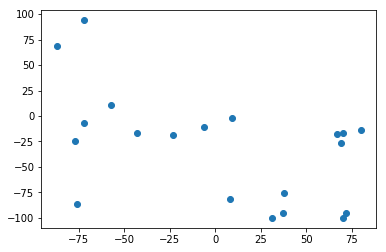

In [84]:
plt.scatter(latitudes, longitude)

给定一个初始点 $P$, 已经 $k$个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短? 

例如： 

In [85]:
chosen_p = (5, 10)

plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')

In [87]:
dot = list(zip(latitudes, longitude))# dot contains latitudes and longitude as (x, y)
dot_name = ["dot"+str(i) for i in range(1,21)]# dot_name contains dot_1 to dot_20
#next, let's calculate dot distance(dot_dis) between any two dots

In [88]:
dot_x_y = {dot_name: dot for dot_name, dot in [i for i in zip(dot_name, dot)]}

import numpy as np
chosen_p = (5, 10)
Total_distance = 0
Root = []
def Root_Minimum(chosen_p, dot_x_y):
    """
    input: 
    chosen_p(tuple), start dot(chosen), like (5, 10)
    dot_dis(dict), all dots in map with coordinate, like {"dot1": (-76, -45), "dot2": (-31, -51),...}
    """
    def Dot_dis_func(dot1, dot2):
        """
        return distance of dot1 and dot2
        input: dot1(tuple), dot2(tuple)
        output: float
        """
        dot_minus_square = [(dot1[k] - dot2[k])**2 for k in range(2)]
        dot_dis = np.sqrt(sum(dot_minus_square))
        return (dot_dis)
    
    global Total_distance, Root
    current_dot = chosen_p
    next_dot = [dot_x_y[i] for i in dot_x_y]
    
    if len(list(dot_x_y)) == 1:
        
        Root += [i for i in dot_x_y]
        Total_distance += Dot_dis_func(current_dot, next_dot[0]) 
        return Total_distance
    
    if len(list(dot_x_y)) == 2:
        
        Distance_1 = Dot_dis_func(current_dot, next_dot[0]) 
        Distance_2 = Dot_dis_func(current_dot, next_dot[1])
        
        if Distance_1 <= Distance_2:
            Root += [i for i in dot_x_y]
            Total_distance += Distance_1 + Dot_dis_func(next_dot[0], next_dot[1]) 
        else:
            Root += [i for i in dot_x_y][::-1]
            Total_distance += Distance_2 + Dot_dis_func(next_dot[0], next_dot[1]) 
            
        return Total_distance
    
    else:
        a = list(enumerate([Dot_dis_func(current_dot, i) for i in next_dot]))
        min_dis, min_place = min([(c, b) for b, c in [i for i in a]])# as the minimum distance is minimum, we find its place accordingly

        min_dot_name = list(dot_x_y)[min_place] # dot with minimum distance, it is "dot1" like
        #print(min_dot_name)
        Root.append(min_dot_name) 
        #print(Root)
        Total_distance += min_dis
        
        chosen_p = next_dot[min_place]
        if min_dot_name in dot_x_y:
            del dot_x_y[min_dot_name]#after pass the dot, delete it from the dict
        return Root_Minimum(chosen_p, dot_x_y)

In [89]:
Minimum_Root_Distance = Root_Minimum(chosen_p, dot_x_y)

In [90]:
"Minimum Distance is:%.2f"%Minimum_Root_Distance

'Minimum Distance is:811.09'

In [91]:
"The Root is: chosen_p => "+" => ".join(Root)

'The Root is: chosen_p => dot18 => dot8 => dot16 => dot12 => dot2 => dot6 => dot13 => dot1 => dot11 => dot14 => dot7 => dot3 => dot9 => dot4 => dot5 => dot17 => dot19 => dot10 => dot20 => dot15'

In [105]:
dot_x_y = {dot_name: dot for dot_name, dot in [i for i in zip(dot_name, dot)]}
dot_x_y["chosen_p"] = (5, 10)

line = ["chosen_p"] + Root
station_pair = []
for j, _ in enumerate(line[:-1]):
    station_pair.append((line[j],line[j+1]))

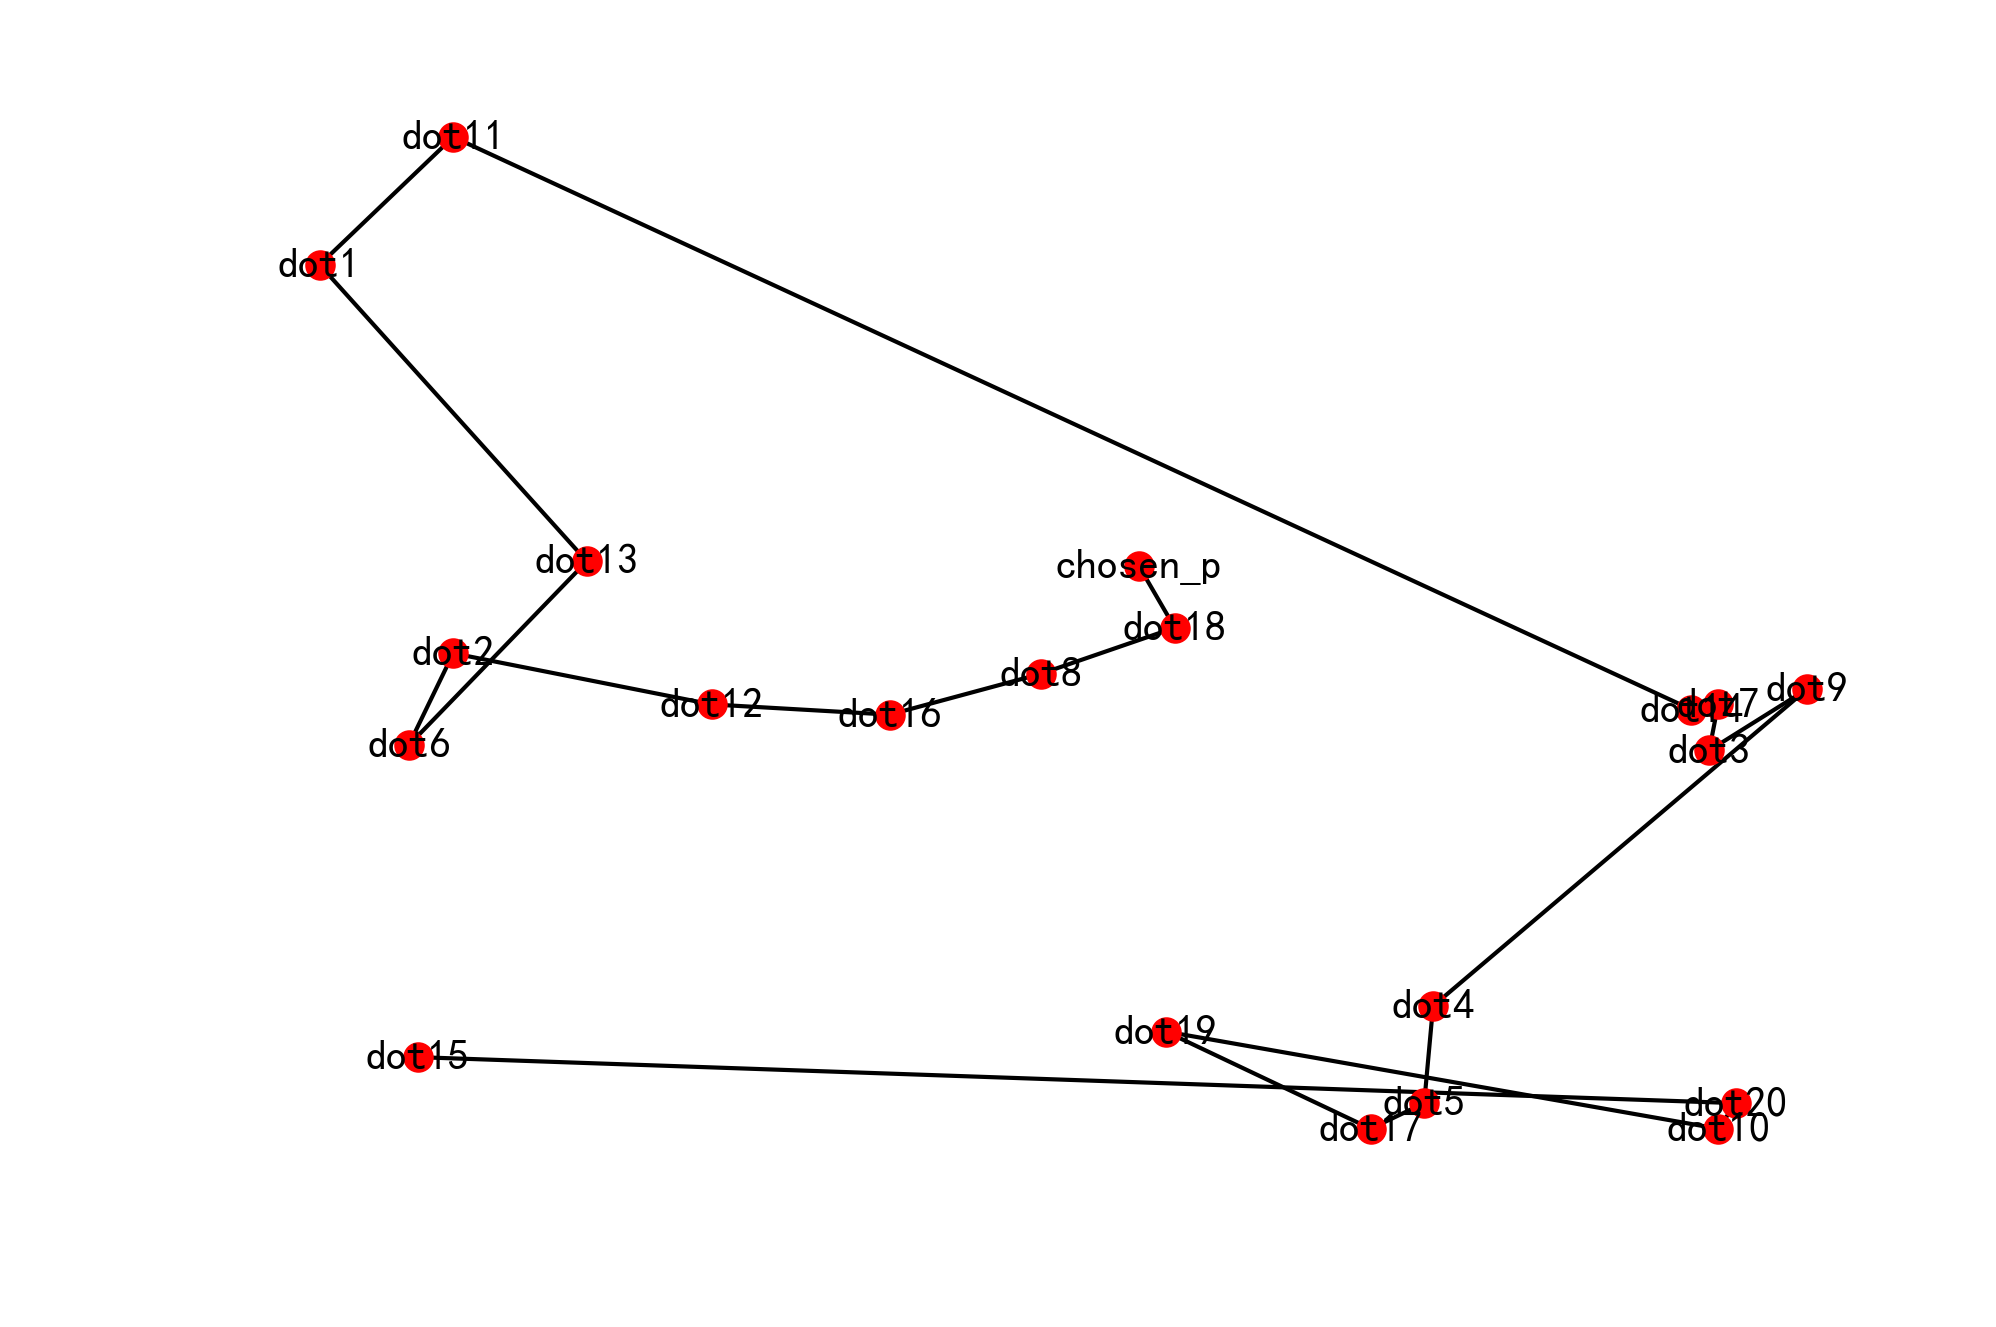

In [108]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ["SimHei"]
import networkx

graph = networkx.Graph()
graph.add_edges_from(station_pair)

plt.figure(1)
networkx.draw(graph, dot_x_y, with_labels=True, node_size=40,font_size=10)
# smaller nodes and fonts
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率

plt.show()